In [1]:
import sklearn

In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
from sklearn.datasets import california_housing

In [7]:
file="C:/Users/Asus/Downloads/housing.csv"

In [8]:
data=pd.read_csv(file)

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
data["total_bedrooms"].isnull().sum()

207

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020492147438>,
      dtype=object)

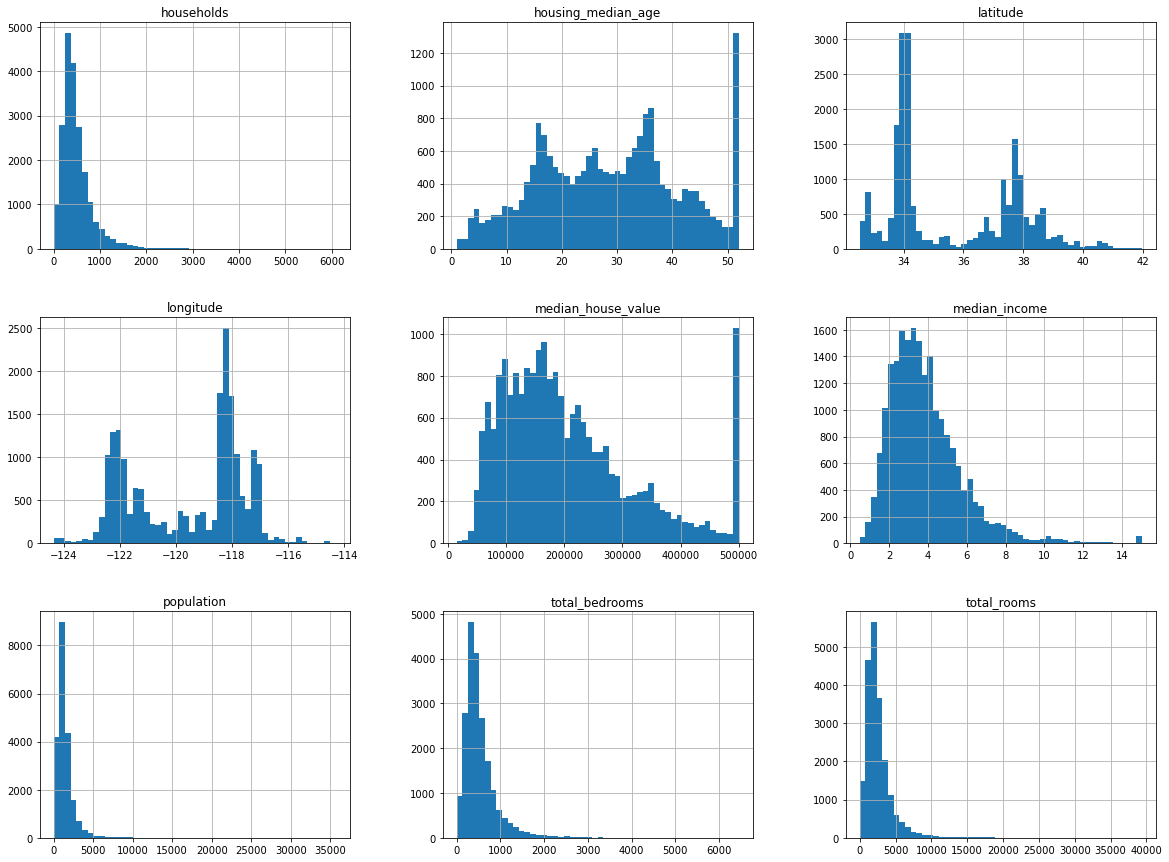

In [13]:
data.hist(bins=50,figsize=(20,15)) 

In [14]:
mean=data["total_bedrooms"].mean()

In [15]:
data=data.fillna(mean)

In [16]:
list=data["total_bedrooms"]

In [17]:
list

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [18]:
l=DataFrame(list)

In [19]:
l

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [20]:
l.isnull().sum()
    

total_bedrooms    0
dtype: int64

In [21]:
for i in l:
    if(pd.isnull(i)==True):
        print(i)
        i=mean
        pass
    pass

In [22]:
data["total_bedrooms"]=l

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
l.mean()

total_bedrooms    537.870553
dtype: float64

In [25]:
len(l)

20640

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)

In [28]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.000000,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.000000,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.000000,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.000000,1227.0,474.0,2.7850,72300.0,INLAND


In [29]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.000000,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.000000,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.000000,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.000000,1227.0,474.0,2.7850,72300.0,INLAND


In [30]:
data=data.fillna(mean)

In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [32]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
train_copy=train_set
train_set.shape
test_set.shape

(4128, 10)

In [36]:
train_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [37]:
corr_matrix=train_copy.corr()

In [38]:
corr_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.142983
longitude            -0.046349
population           -0.026032
total_bedrooms        0.047980
households            0.063714
housing_median_age    0.103706
total_rooms           0.133989
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [39]:
train_copy['rph']=train_copy['total_rooms']/train_copy['households']

In [40]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
train_copy.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rph
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421


In [42]:
corr=train_copy.corr()

In [43]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
rph                   0.158485
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [44]:
housing=train_copy

In [45]:
label=train_set["median_house_value"].copy()

In [46]:
label

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [47]:
train_copy.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rph
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421


In [48]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rph
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421


In [49]:
housing.shape

(16512, 11)

In [50]:
housing = pd.concat([housing,pd.get_dummies(housing['ocean_proximity'], prefix='ocean_proximity')],axis=1)
housing.drop(['ocean_proximity'],axis=1,inplace=True)


In [51]:
housing.min()

longitude                      -124.350000
latitude                         32.550000
housing_median_age                1.000000
total_rooms                       2.000000
total_bedrooms                    1.000000
population                        3.000000
households                        1.000000
median_income                     0.499900
median_house_value            14999.000000
rph                               0.888889
ocean_proximity_<1H OCEAN         0.000000
ocean_proximity_INLAND            0.000000
ocean_proximity_ISLAND            0.000000
ocean_proximity_NEAR BAY          0.000000
ocean_proximity_NEAR OCEAN        0.000000
dtype: float64

In [52]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rph,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,5.017657,0,0,0,0,1
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4.473545,0,0,0,0,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0,0,0,0,1
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4.002817,0,0,0,0,1
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,6.268421,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,6.129032,1,0,0,0,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,6.868597,0,1,0,0,0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,3.986717,1,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,6.395349,1,0,0,0,0


In [136]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   median_house_value          16512 non-null  float64
 9   rph                         16512 non-null  float64
 10  ocean_proximity_<1H OCEAN   16512 non-null  uint8  
 11  ocean_proximity_INLAND      16512 non-null  uint8  
 12  ocean_proximity_ISLAND      16512 non-null  uint8  
 13  ocean_proximity_NEAR BAY   

In [137]:
from sklearn import model_selection

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dtc=DecisionTreeClassifier()

In [141]:
lr=LinearRegression()

In [142]:
value=housing["median_house_value"]

In [158]:
len(value)

16512

In [166]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   rph                         16512 non-null  float64
 9   ocean_proximity_<1H OCEAN   16512 non-null  uint8  
 10  ocean_proximity_INLAND      16512 non-null  uint8  
 11  ocean_proximity_ISLAND      16512 non-null  uint8  
 12  ocean_proximity_NEAR BAY    16512 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN 

In [167]:
X_train,X_test,y_train,y_test=train_test_split(housing,value,test_size=0.1,random_state=23)

In [169]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14860 entries, 2888 to 9485
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   14860 non-null  float64
 1   latitude                    14860 non-null  float64
 2   housing_median_age          14860 non-null  float64
 3   total_rooms                 14860 non-null  float64
 4   total_bedrooms              14860 non-null  float64
 5   population                  14860 non-null  float64
 6   households                  14860 non-null  float64
 7   median_income               14860 non-null  float64
 8   rph                         14860 non-null  float64
 9   ocean_proximity_<1H OCEAN   14860 non-null  uint8  
 10  ocean_proximity_INLAND      14860 non-null  uint8  
 11  ocean_proximity_ISLAND      14860 non-null  uint8  
 12  ocean_proximity_NEAR BAY    14860 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  1

In [170]:
from sklearn.metrics import mean_squared_error

In [171]:
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)



In [172]:
len(y_test)

1652

In [173]:
len(pred1)

1652

In [174]:
rmse1=np.sqrt(metrics.mean_squared_error(y_test, pred1))

In [175]:
rmse1

66087.31487380723

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler=StandardScaler()

In [181]:
scaled = scaler.fit_transform(housing)

In [182]:
scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

In [183]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rph,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0,0,0,0,1
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0,0,0,0,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0,0,0,0,1
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0,0,0,0,1
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,1,0,0,0,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0,1,0,0,0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,1,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,1,0,0,0,0


In [184]:
housing3=DataFrame(scaled)

In [185]:
housing3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,-0.894683,-0.680574,-0.015566,-0.355646,2.629758
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.894683,-0.680574,-0.015566,-0.355646,2.629758
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.894683,-0.680574,-0.015566,-0.355646,2.629758
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,-0.894683,-0.680574,-0.015566,-0.355646,2.629758
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.894683,1.469348,-0.015566,-0.355646,-0.380263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,0.290620,1.117714,-0.680574,-0.015566,-0.355646,-0.380263
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.600411,-0.894683,1.469348,-0.015566,-0.355646,-0.380263
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.606759,1.117714,-0.680574,-0.015566,-0.355646,-0.380263
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,0.402175,1.117714,-0.680574,-0.015566,-0.355646,-0.380263


In [196]:
X_train2,X_test2,y_train2,y_test2=train_test_split(housing3,value,test_size=0.2,random_state=23)

In [197]:
lr.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
lrpred2=lr.predict(X_test2)

In [211]:
rmse2=np.sqrt(metrics.mean_squared_error(y_test2, lrpred2))

In [212]:
rmse2

66511.47607724313

In [203]:
y_test2

8849     500001.0
627      178900.0
13391    120400.0
6686     209200.0
14576    161400.0
           ...   
12853     77000.0
13904     73300.0
19135    292700.0
13803    108000.0
16824    263900.0
Name: median_house_value, Length: 3303, dtype: float64

In [204]:
lrpred2

array([675025.57364126, 224646.3412378 , 136826.42025275, ...,
       234020.26875506, 177260.17615236, 312804.07678401])

In [205]:
X_test2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
12134,0.589497,-0.731606,1.856173,0.539412,-0.237466,-0.141117,-0.228338,5.839268,1.592615,1.117714,-0.680574,-0.015566,-0.355646,-0.380263
12325,-1.295233,0.962674,0.507194,-0.036791,0.037001,-0.025024,0.065659,-0.257402,-0.232578,-0.894683,-0.680574,-0.015566,2.811787,-0.380263
1465,0.993367,-0.726925,-1.000489,-0.110828,-0.175412,0.290713,0.000034,0.049755,-0.265251,-0.894683,1.469348,-0.015566,-0.355646,-0.380263
12277,0.754037,-0.698843,1.300711,-0.711404,-0.719572,-0.663534,-0.698208,-0.247897,-0.316570,-0.894683,1.469348,-0.015566,-0.355646,-0.380263
1567,1.187824,-1.316647,0.507194,-0.581723,-0.449879,-0.557995,-0.490835,-0.542766,-0.433910,-0.894683,-0.680574,-0.015566,-0.355646,2.629758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11591,-0.896348,1.421347,0.507194,-0.495270,-0.593079,-0.497311,-0.585334,-0.733288,0.089886,-0.894683,1.469348,-0.015566,-0.355646,-0.380263
1078,1.591694,-0.698843,-1.079841,1.352442,1.457068,1.127988,1.218021,-0.999274,0.149231,-0.894683,1.469348,-0.015566,-0.355646,-0.380263
5018,-1.539550,1.248175,-0.048268,-0.334319,-0.285199,-0.436626,-0.414711,-0.048972,0.068772,1.117714,-0.680574,-0.015566,-0.355646,-0.380263
13881,1.023284,-0.637999,0.507194,-0.511825,-0.478519,-0.649462,-0.640459,0.119494,0.225117,-0.894683,1.469348,-0.015566,-0.355646,-0.380263


In [209]:
lrpred3=lrpred2-np.median(lrpred2)

In [214]:
lrpred3

array([470791.23949964,  20412.00709618, -67407.91388887, ...,
        29785.93461344, -26974.15798926, 108569.74264238])

In [216]:
from sklearn.ensemble import RandomForestRegressor


In [217]:
for_reg=RandomForestRegressor()

In [218]:
for_reg.fit(X_train2,y_train2)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [221]:
pred4=for_reg.predict(X_test2)

In [222]:
rmse3=np.sqrt(metrics.mean_squared_error(y_test2, pred4))

In [223]:
rmse3

51084.13428005786

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [227]:
grid_search = GridSearchCV(estimator = for_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [228]:
grid_search.fit(X_train2,y_train2)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 16.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80

In [229]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [231]:
best_grid = grid_search.best_estimator_



In [232]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [234]:
best_grid.fit(X_train2,y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [235]:
pred5=best_grid.predict(X_test2)

In [236]:
rmse4=np.sqrt(metrics.mean_squared_error(y_test2, pred5))

In [237]:
rmse4

50530.9462087562

In [238]:
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [239]:
grid_search2 = GridSearchCV(estimator = for_reg, param_grid = param_grid2, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [241]:
grid_search2.fit(X_train2,y_train2)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 23.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [40

In [242]:
best_grid2 = grid_search2.best_estimator_

In [243]:
best_grid2.fit(X_train2,y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [244]:
pred5=best_grid.predict(X_test2)

In [245]:
rmse5=np.sqrt(metrics.mean_squared_error(y_test2, pred5))

In [246]:
rmse5

50530.9462087562

In [247]:
best_grid2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)